<div style=" background-color: RGB(0,10,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python
</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie 1: Traitement et test
</h3>
</div>

<div style="background-color: RGB(0,10,200) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); "> 1.1 - Importation des librairies </a></h3>
</div>

In [1]:
# Importation des librairies Pandas, Matplotlib et Numpy
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

<div style="border: 5px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">1.2 - Chargement des fichiers CSV </h3>
</div>

In [2]:
#Importation du fichier "billets_production"
billets_production=pd.read_csv('billets_production.csv')
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [3]:
#Importation du fichier "billets", et spécifier le bon délimiteur en ajoutant l'argument "sep"
billets=pd.read_csv('billets.csv', sep=';')
billets.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="background-color: RGB(0,10,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">2.1 - Analyse exploratoire du fichier "billets_production"</h3>
</div>

In [4]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
billets_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">2.2 - Analyse exploratoire du fichier "billets"</h3>
</div>

In [5]:
#Information sur le dataframe du nombre de lignes, de colonnes, du type de valeur et du nombre de valeurs non nulles
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


**<span style="color:blue"> La colonne "margin_low" n'a que 1463 lignes non-nulles.
<span>** 

In [6]:
#Nombre de faux et de vrai billets
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

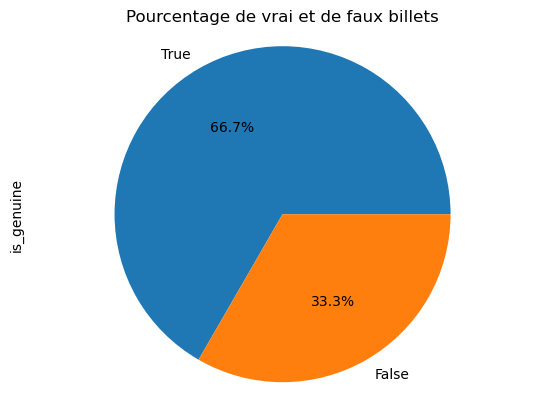

In [7]:
# Diagramme en secteurs
billets['is_genuine'].value_counts(normalize=True).plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage de vrai et de faux billets")
plt.axis('equal') 
plt.show() # Affiche le graphique

In [8]:
#Analyse statistique des vrais billets
Vrai_billets=billets.loc[billets["is_genuine"]==True]
Vrai_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [9]:
#Analyse statistique des faux billets
Faux_billets=billets.loc[billets["is_genuine"]==False]
Faux_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


## 1. Distribution des variables

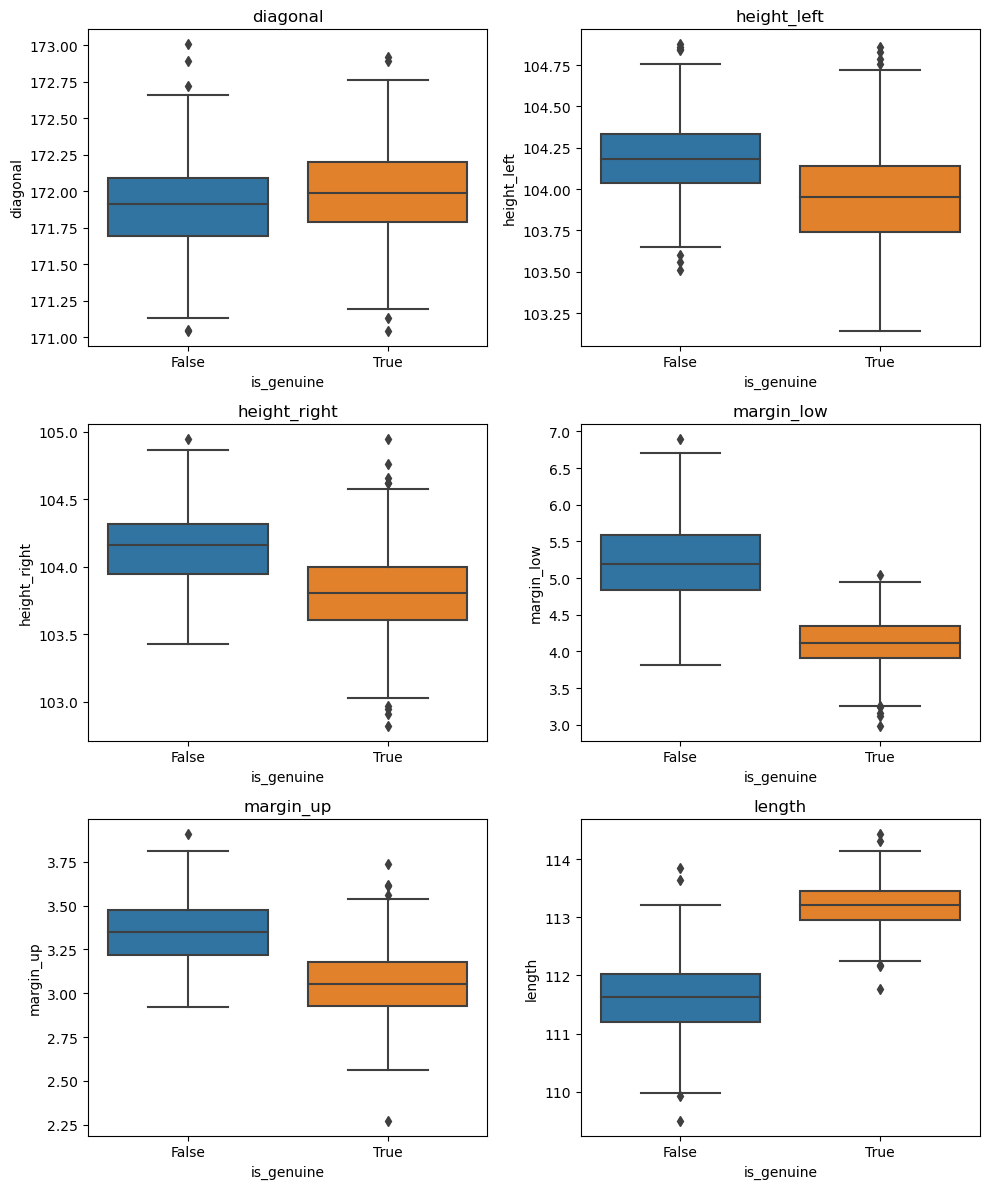

In [10]:
# Sélectionner uniquement les colonnes numériques
df_numeric = billets.select_dtypes(include=[np.number])

# Ajouter le type de publication aux données numériques
df_numeric['is_genuine'] = billets['is_genuine']

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('is_genuine'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='is_genuine', y=column, data=df_numeric)
    plt.title(column)

plt.tight_layout()
plt.show()

**<span style="color:blue"> Les bloxplots nous permettent de constater que les vrais billets se démarquent par une diagonale plus longue, alors que les valeurs des autres dimensions sont plus courtes que ceux des faux billets.
<span>**
    
**<span style="color:blue"> On observe également des outliers est-ce que c'est dû aux faux négatifs ou faux positifs?
<span>**

## 2. Visualisation  des valeurs manquantes

In [11]:
#Création du dataframe "ValeursManquantes" pour visualiser les valeurs manquantes dans la colonne "margin_low" 
#Il servira de dataframe de test pour la régression linéaire
ValeursManquantes=billets.loc[billets['margin_low'].isna(),:]
ValeursManquantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


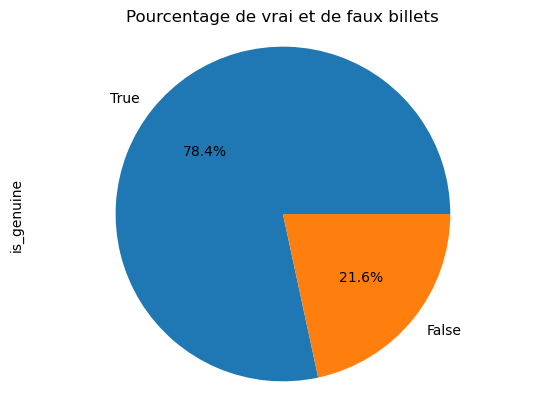

In [12]:
# Diagramme en secteurs
ValeursManquantes['is_genuine'].value_counts(normalize=True).plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage de vrai et de faux billets")
plt.axis('equal') 
plt.show() # Affiche le graphique

In [13]:
#Visualisation du nombre de valeurs manquantes pour les vrais et faux billets
ValeursManquantes['is_genuine'].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

In [14]:
#Création d'un "billets" sans les valeurs manquantes
#Il servira de dataframe d'entraînement pour la régresssion linéaire
billets=billets.dropna()

In [15]:
#Vérifier que les valeurs manquantes ont bien été supprimées
billets.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">2.3 - Régression linéaire multiple</h3>
</div>

**<span style="color:blue"> Nous allons utiliser la régression linéaire multiple pour prédire les valeurs manquantes dans la colonne "margine_low" à partir des valeurs "diagonale", "height_left", "height_right", "margin_up" et "length".
<span>**

#### 2.3.1. Corrélation entre les variables

**<span style="color:blue"> Nous allons vérifier la corrélation entre les variables pour éviter les problèmes de multicolinéarités entre les variables explicatives lorsque l'on voudra faire une régression linéaire multiple
<span>**

<AxesSubplot:>

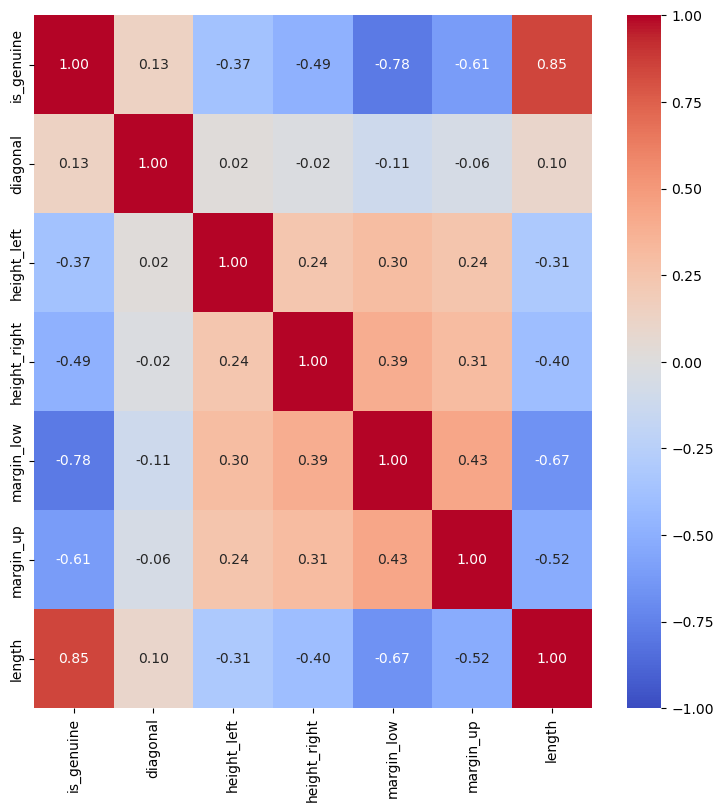

In [16]:
# Heatmap pour visualiser les corrélations
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(billets.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

**<span style="color:blue"> 
Variables corrélées:
«is_genuine » & «margine_up»,
«is_genuine » & «margine_low»,
«margine_low» & «margine_up»
<span>**
    
**<span style="color:blue"> 
Variables anti-corrélées:
«is_genuine » & «length»,
«margine_up» & «length»
<span>**

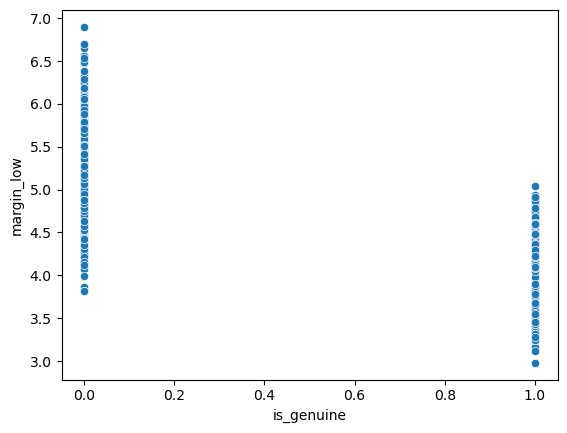

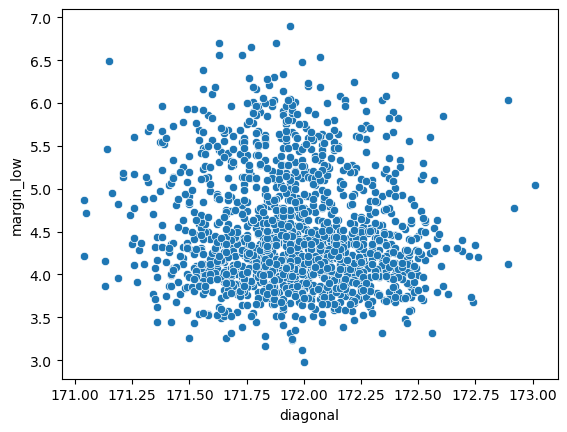

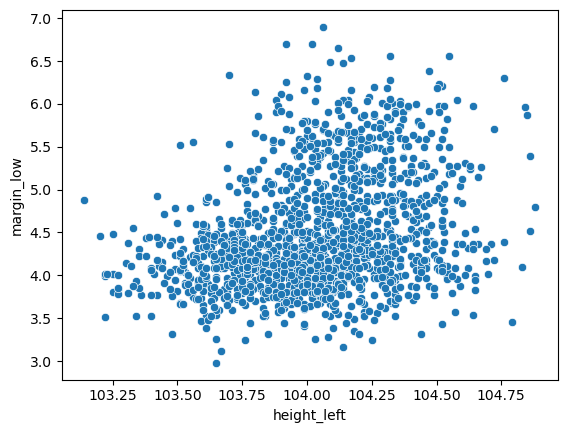

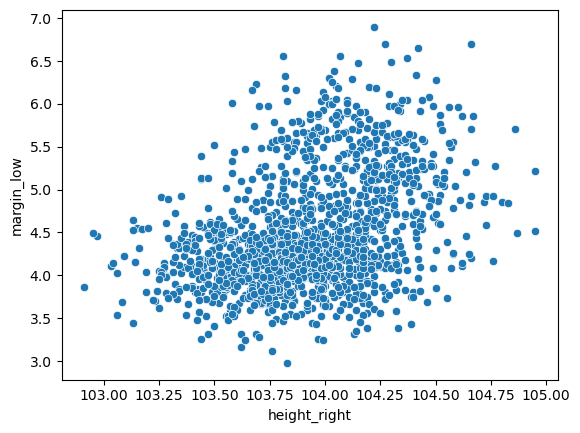

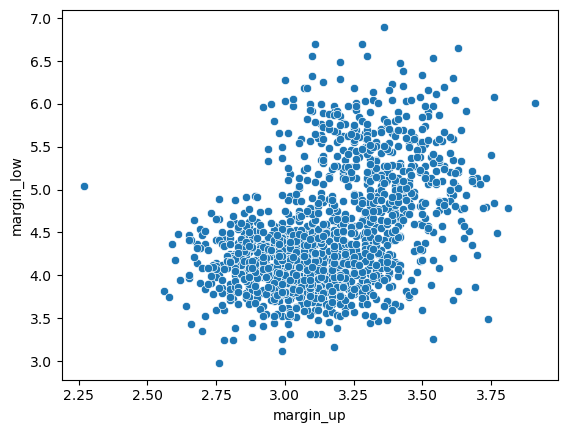

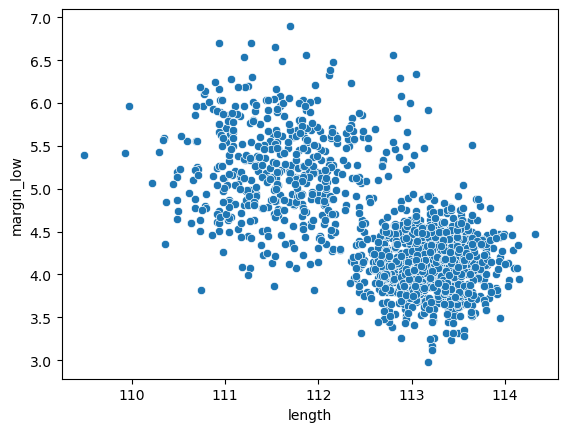

In [17]:
# Extraction des colonnes de variables explicatives
X = billets.drop("margin_low", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=billets["margin_low"])
    plt.show()

**<span style="color:blue"> Les nuages de points confirment bien le heatmap on observe une corrélation linéaire entre "margin_up" et "margin_low" et une anti-corrélation entre "length" et "margin_low".<span>**

### 3. Régression linéaire multiple 

**<span style="color:blue"> Nous allons d'abord mettre la colonne "is_genuine" qui est au format booléen sous forme numérique
pour les dataframes "ValeursManquantes" et "billets".<span>**

#### 3.1. Convertir la "is_genuine" de valeur booléen en valeur numérique

In [18]:
billets["is_genuine"]=billets["is_genuine"].astype(int)
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [19]:
ValeursManquantes["is_genuine"]=ValeursManquantes["is_genuine"].astype(int)
ValeursManquantes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


#### 3.2. Visualiser les résultats d'une régression linéaire et retirer les variables non significatives 

In [20]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.75e-299
Time:                        18:55:56   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

**<span style="color:blue">On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.*<span>**

**<span style="color:blue">Le $R^{2}$ vaut environ 0.62, et le $R^{2}$ ajusté est d'environ 0.62.*<span>**

**<span style="color:blue">Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de ces $R^{2}$.*<span>**


**<span style="color:blue">On en enlève "length" car il a une p-valeur de 0.87 qui est moins significative<span>**

In [21]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.12e-300
Time:                        18:55:56   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4247      7.873      0.308   

**<span style="color:blue">On en enlève "diagonal" car il a une p-valeur de 0.72 qui est moins significative<span>**

In [22]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.76e-302
Time:                        18:55:56   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3902      5.476      0.071   

**<span style="color:blue">On en enlève "height_right" car il a une p-valeur de 0.49 qui est moins significative<span>**

In [23]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.63e-303
Time:                        18:55:56   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9104      4.035      0.721      

**<span style="color:blue">On en enlève "height_left" car il a une p-valeur de 0.44 qui est moins significative<span>**

In [24]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.24e-304
Time:                        18:55:56   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

#### 2.2. Création du dataframe "data_test"

**<span style="color:blue"> Le dataframe "ValeursManquantes" contenant les valeurs manquantes serviront de data test.<span>**

In [25]:
data_test=ValeursManquantes[ValeursManquantes["margin_low"].isnull()]
data_test.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [26]:
# A partir du dataframe "data_test" on crée "xtest" (variables explicatives) en supprimant la colonne "margin_low"
xtest=data_test[["is_genuine","margin_up"]]

In [27]:
#A partir du dataframe "data_test" on crée "ytest" (variable à expliquer ou à prédire) en ne gardant que la colonne "margin_low"
ytest=data_test["margin_low"]

#### 2.3.Création de "xtrain" et "ytrain"

In [28]:
# A partir du dataframe "billets" on crée "xtrain" (variables explicatives) en supprimant la colonne "margin_low"
xtrain=billets[["is_genuine","margin_up"]]

In [29]:
#A partir du dataframe "billets" on crée "ytrain" (variable à expliquer) en ne gardant que la colonne "margin_low"
ytrain=billets["margin_low"]

#### 2.4. Appplication du modèle et prédiction des valeurs manquantes

In [30]:
# Entraîner le modèle sur le data d'entraînement (xtrain, ytrain)
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [31]:
#Appliquer le model d'entraînement sur "xtest"
ypred=lr.predict(xtest)
ypred

array([4.07424786, 4.0975613 , 4.12299415, 3.99582991, 4.12299415,
       4.13782997, 4.07848666, 4.12723295, 4.10180011, 4.09332249,
       4.12511355, 4.18869567, 4.13147176, 4.06365084, 4.19081507,
       4.22048673, 4.11239713, 4.10815832, 4.07636726, 4.0996807 ,
       4.12511355, 4.12935236, 4.14842699, 4.11239713, 4.13147176,
       4.21624792, 4.12299415, 4.07000905, 4.12935236, 5.24592539,
       5.254403  , 5.28619406, 5.3052687 , 5.20565671, 5.16114923,
       5.17174625, 5.23956717])

In [32]:
# Remplacement des valeurs manquantes
data_test.loc[data_test.margin_low.isnull(),"margin_low"]=ypred

#### 2.5.Concaténer les deux dataframes "billets" et "data_test"

In [33]:
# Le résultat de la concaténation "liste_concat" est stocké et met à jour le dataframe "billets"
liste_concat = [billets, data_test]
billets=pd.concat(liste_concat)

In [34]:
#Si la concaténation s'est bien déroulée en vérifiant le nombre de valeurs nulles
billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int32  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 87.9 KB


In [35]:
# Vérifier si il y a bien 1000 vrais billets
Vrai_billets=billets.loc[billets["is_genuine"]==True]
Vrai_billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 981
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1000 non-null   int32  
 1   diagonal      1000 non-null   float64
 2   height_left   1000 non-null   float64
 3   height_right  1000 non-null   float64
 4   margin_low    1000 non-null   float64
 5   margin_up     1000 non-null   float64
 6   length        1000 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 58.6 KB


In [36]:
# Vérifier si il y a bien 500 faux billets
Faux_billets=billets.loc[billets["is_genuine"]==False]
Faux_billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    500 non-null    int32  
 1   diagonal      500 non-null    float64
 2   height_left   500 non-null    float64
 3   height_right  500 non-null    float64
 4   margin_low    500 non-null    float64
 5   margin_up     500 non-null    float64
 6   length        500 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 29.3 KB


In [37]:
#Analyse statistique des vrais billets après avoir remplacer les valeurs manquantes de "margin_low" après une régresssion linéaire multiple
Vrai_billets.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.0,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,1.0,171.987080,103.949130,103.80865,4.116185,3.05213,113.202430
std,0.0,0.300441,0.300231,0.29157,0.314554,0.18634,0.359552
min,1.0,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,1.0,171.790000,103.740000,103.61000,3.910000,2.93000,112.950000
50%,1.0,171.990000,103.950000,103.81000,4.112397,3.05000,113.205000
75%,1.0,172.200000,104.140000,104.00000,4.330000,3.18000,113.460000
max,1.0,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [38]:
#Analyse statistique des faux billets après avoir remplacer les valeurs manquantes de "margin_low" après une régresssion linéaire multiple
Faux_billets.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.0,171.901160,104.190340,104.143620,5.216220,3.350160,111.630640
std,0.0,0.306861,0.223758,0.270878,0.549114,0.180498,0.615543
min,0.0,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,0.0,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,0.0,171.910000,104.180000,104.160000,5.195000,3.350000,111.630000
75%,0.0,172.092500,104.332500,104.320000,5.590000,3.472500,112.030000
max,0.0,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


In [39]:
#Analyse statistique d l'ensemble après avoir remplacer les valeurs manquantes de "margin_low" après une régresssion linéaire multiple
billets.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### 2.6.  Distribution des variables après la régression linéaire multiple

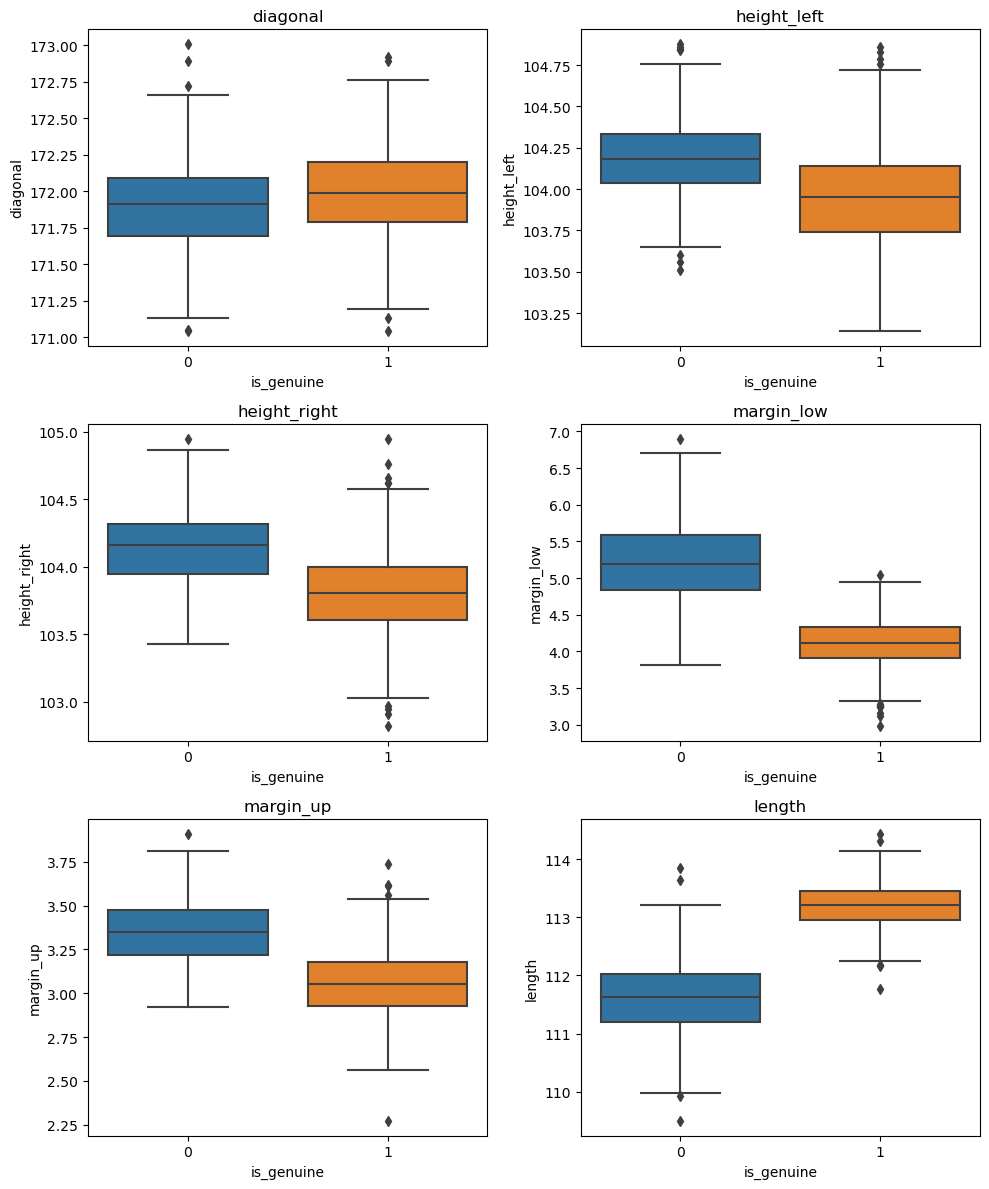

In [40]:
# Sélectionner uniquement les colonnes numériques
df_numeric = billets.select_dtypes(include=[np.number])

# Ajouter le type de publication aux données numériques
df_numeric['is_genuine'] = billets['is_genuine']

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('is_genuine'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='is_genuine', y=column, data=df_numeric)
    plt.title(column)

plt.tight_layout()
plt.show()

**<span style="color:blue"> Analyse des différences entre les vrais et les faux billets après une régression linéaire multiple.<span>**

### 3. Analyse approfondie

In [41]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1229.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.45e-316
Time:                        18:55:57   Log-Likelihood:                -775.59
No. Observations:                1500   AIC:                             1557.
Df Residuals:                    1497   BIC:                             1573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.192     30.942      0.0

In [42]:
alpha = 0.05

In [43]:
n = billets.shape[0]
p = 3

In [44]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

#### 3.1  Calculer les leviers
**<span style="color:blue">On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.<span>**


**<span style="color:blue">Le calcul des leviers en régression linéaire permet d'identifier les points de données qui ont un impact significatif sur le modèle. Il aide à assurer la robustesse et la fiabilité des résultats de la régression.<span>**




In [45]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

In [46]:
analyses.describe()

,obs,levier
count,1500.000000,1500.000000
mean,750.500000,0.002000
std,433.157015,0.001037
min,1.000000,0.001000
25%,375.750000,0.001152
50%,750.500000,0.001969
75%,1125.250000,0.002408
max,1500.000000,0.013008


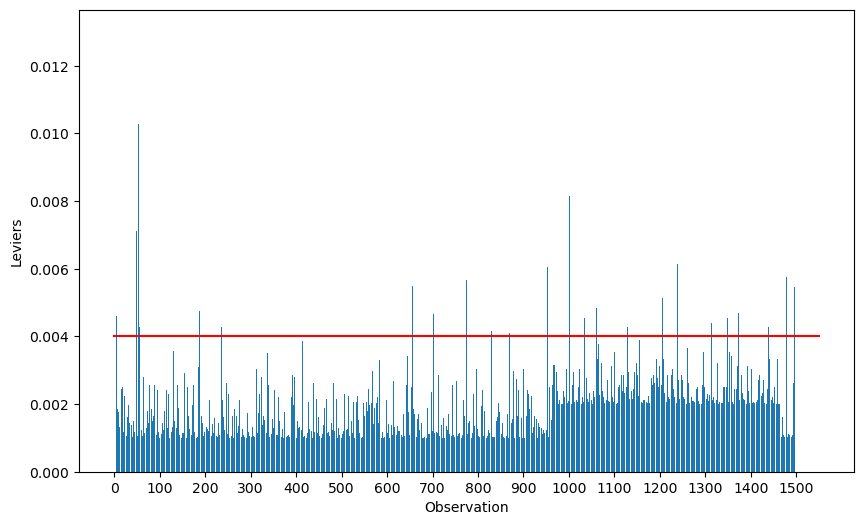

In [47]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1550, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1550], [seuil_levier, seuil_levier], color='r')
plt.show()

**<span style="color:blue">Pour sélectionner les points pour lesquels le levier est supérieur au seuil (ligne rouge), on exécute la ligne suivante :<span>**

In [48]:
analyses.loc[analyses['levier'] > seuil_levier, :].head(45)

,obs,levier
4,5,0.004594
48,49,0.007109
52,53,0.010288
54,55,0.004265
123,124,0.005672
128,129,0.005115
186,187,0.004763
235,236,0.004265
322,323,0.004107
328,329,0.004174


#### 3.2. Calculez les résidus studentisés

**<span style="color:blue">Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté <span>**


**<span style="color:blue">Utilité de calculer les résidus studentisés:<span>**

**<span style="color:blue">1. Vérification de l'homoscédasticité : Il aide à déterminer si la variance des résidus est constante à travers l'ensemble des observations.<span>**
    
**<span style="color:blue">2. Identification des valeurs aberrantes : Il détecte les valeurs aberrantes ou atypiques, c'est-à-dire les observations qui ont un résidu bien au-dessus ou en dessous de ce qui serait attendu en supposant une distribution normale des résidus.<span>** 

**<span style="color:blue">3. Évaluation de l'influence des observations : Les résidus studentisés mesurent l'influence de chaque observation sur les résultats du modèle. Les observations avec des résidus studentisés élevés peuvent indiquer des observations influentes qui ont un effet significatif sur les coefficients de régression et les prédictions du modèle.
<span>**  

In [49]:
from scipy.stats import t, shapiro
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

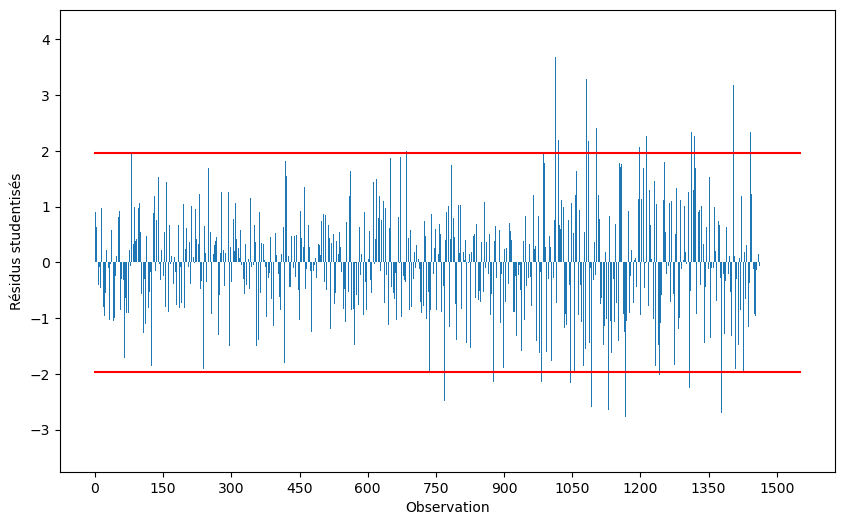

In [50]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1550, step=150))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1550], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1550], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

#### 3.3. Déterminez la distance de Cook

**<span style="color:blue">Pour trouver la distance de Cook, nous exécutons ceci :<span>**

**<span style="color:blue">la distance de Cook en régression linéaire pour évaluer l'influence de chaque observation sur le modèle de régression et pour détecter les observations atypiques ou influentes qui pourraient affecter la qualité de l'ajustement du modèle.<span>**

In [51]:
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [52]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter les observations influentes comme ceci :

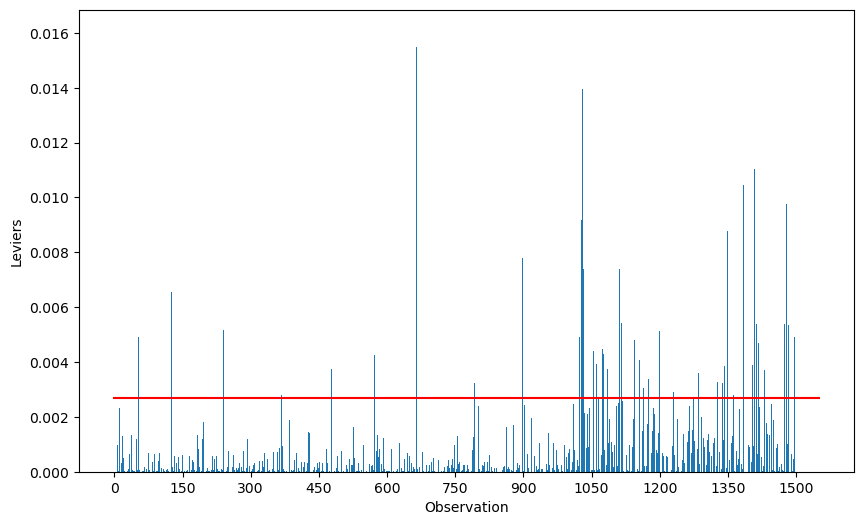

In [53]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1550, step=150))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1550], [seuil_dcook, seuil_dcook], color='r')
plt.show()

#### 3.4. Vérifier la colinéarité des variables
**<span style="color:blue">Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :<span>**

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.58116247948, 1.5811624794799992]

**<span style="color:blue">Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.<span>**


#### 3.5. Testez l’homoscédasticité
**<span style="color:blue">On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :<span>**


<div style="background-color: RGB(0,10,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Méthodes de Prédiction</h2>
</div>

<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">3.1 - Régression Logistique</h3>
</div>

#### 3.1.1. Visualisation du nuage de point

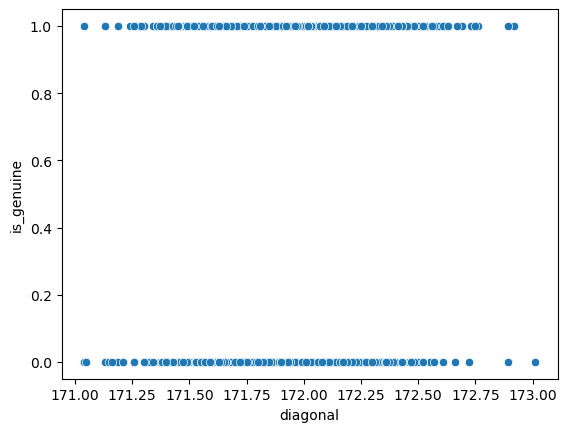

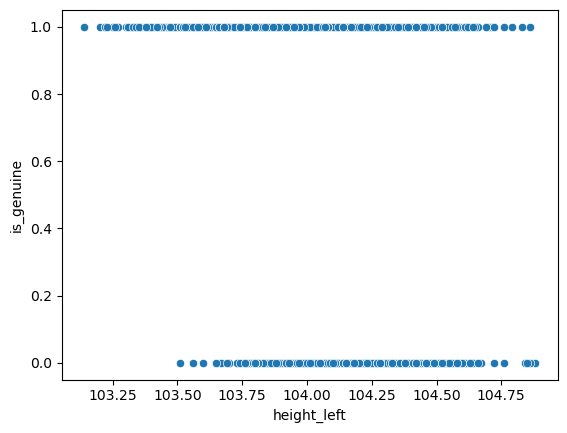

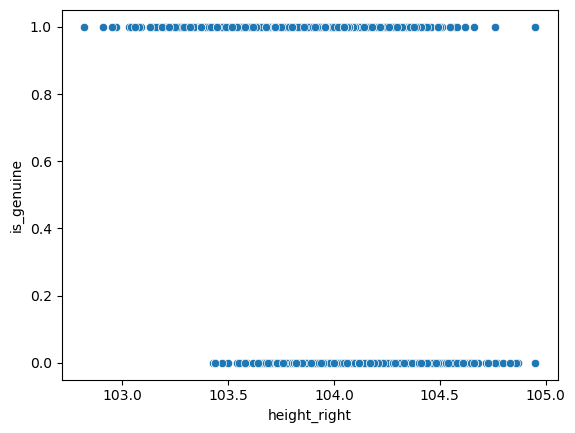

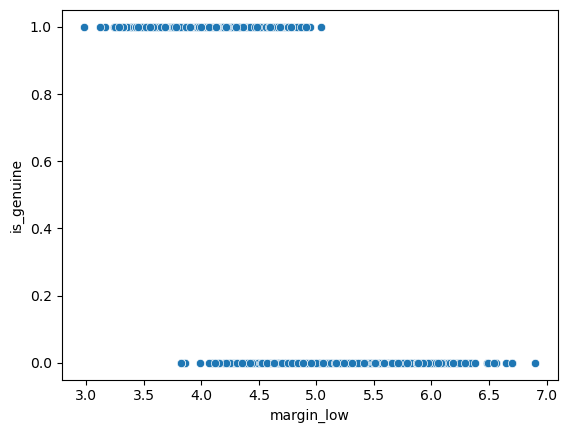

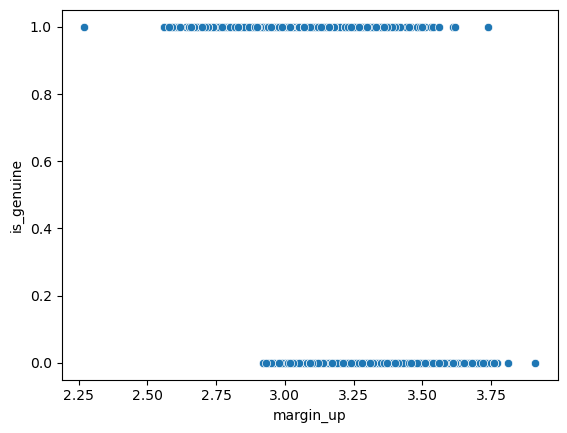

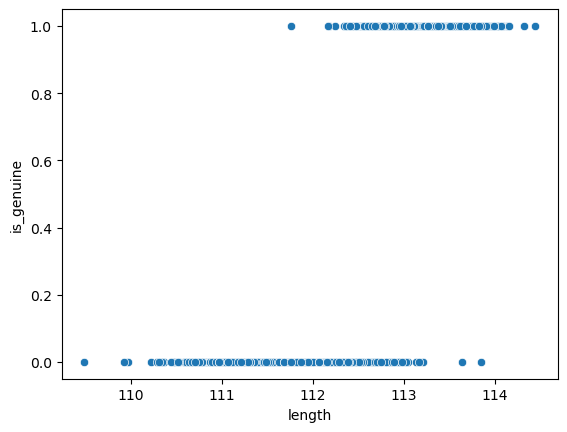

In [55]:
# Extraction des colonnes de variables explicatives
X = billets.drop("is_genuine", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=billets["is_genuine"])
    plt.show()

#### 3.1.2. Visualiser les résultats d'une régression logistique et retirer les variables non significatives 

In [56]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [57]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=billets, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1493
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.487
Date:                Mon, 27 Nov 2023   Deviance:                       78.975
Time:                        18:56:04   Pearson chi2:                 2.80e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7049
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -231.2739    249.978     -0.925   

**<span style="color:blue"> La colonne "diagonal" a un p-value de 0.82, on  va donc le retirer car il n'a pas d'effet significatif sur l'évènement <span>**

In [58]:
reg_log2 = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length',
                   data=billets, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.515
Date:                Mon, 27 Nov 2023   Deviance:                       79.031
Time:                        18:56:04   Pearson chi2:                 2.80e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7049
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -186.0304    159.578     -1.166   

**<span style="color:blue"> La colonne "height_left" a un p-value de 0.249, on  va donc le retirer car il n'a pas d'effet significatif sur l'évènement <span>**

In [59]:
reg_log2 = smf.glm('is_genuine~height_right+margin_low+margin_up+length',
                   data=billets, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1495
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.175
Date:                Mon, 27 Nov 2023   Deviance:                       80.351
Time:                        18:56:04   Pearson chi2:                 3.42e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7046
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -282.6640    139.403     -2.028   

**<span style="color:blue"> La colonne "height_right" a un p-value de 0.249, on  va donc le retirer car il n'a pas d'effet significatif sur l'évènement. <span>**

In [60]:
reg_log2 = smf.glm('is_genuine~margin_low+margin_up+length',
                   data=billets, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1496
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.515
Date:                Mon, 27 Nov 2023   Deviance:                       91.031
Time:                        18:56:05   Pearson chi2:                 9.02e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7025
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -648.1608     89.492     -7.243      0.0

#### 3.1.3. Création des données d'entraînement

In [61]:
#Préparation des données d'entraînement
X=billets[["margin_low","margin_up","length"]]
Y=billets["is_genuine"]

In [62]:
#Création d'un fichier CSV
X.to_csv('X.csv', index=False)

Y.to_csv('Y.csv', index=False)



In [63]:
#Division de la base de donnée
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

#### 3.1.4. Application du modèle de prédiction 0 (faux) ou 1 (vrai)

In [64]:
#Création du modèle
model=LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [65]:
# Test model
predictions=model.predict(X_test)
print(predictions)


[0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0
 1 0 0 1]


#### 3.1.5.Etude des métriques d'évaluation de la régression logistique

TP = True Positive
FP = False Positive

TN = True Negative
FN = False Negative


precision = Taux de confiance à la métrique lorsqu'il détecte les vrai billets<br>
precision = $\frac{TP}{TP+FP}$

recall = Taux de vrai positif<br>
recall =$\frac{TP}{P}$

f1-score = Mixte entre le recall et la précision<br>
f1-score = $\frac{2 X Precision x Recall}{Precison + Recall}$

accuracy= Taux de bonne reconnaissance<br>
accuracy= $\frac{TP+TN}{P+N}$


In [66]:
#Evaluation du model
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       111
           1       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [67]:
print(accuracy_score(Y_test, predictions))

0.9933333333333333


**<span style="color:blue"> Le modèle a correctement prédit environ 99.33% des échantillons de test<span>**


<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">3.2 - Matrice de confusion</h3>
</div>

In [68]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n", confusion_matrix(Y_test, predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
print(tn, fp, fn, tp)

Confusion matrix:
 [[110   1]
 [  1 188]]
110 1 1 188


C:\Users\bello\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\bello\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


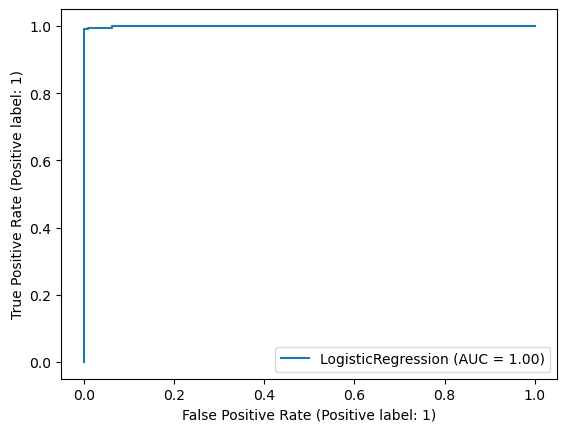

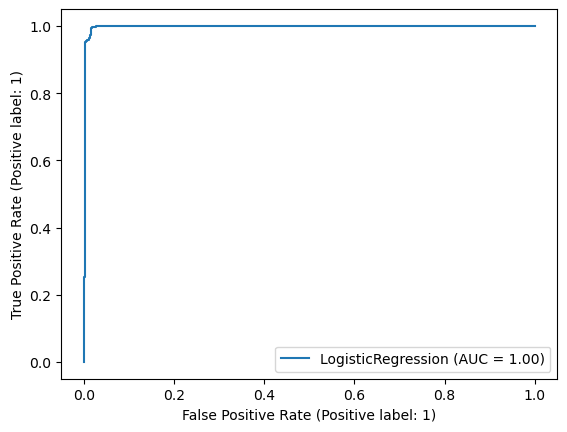

In [69]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model,X_test,Y_test)
plot_roc_curve(model,X_train,Y_train,)
plt.show()

**<span style="color:blue">Les courbes semblent indiquer que le modèle de régression logistique semble parfait. <span>**

<div style="border: 1px solid RGB(0,10,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,10,200); ">3.2 - Kmeans</h3>
</div>

#### 3.2.1. Création des données d'entraînement

In [70]:
billets2=billets[["margin_low","margin_up","length"]]
billets2.head(2)

,margin_low,margin_up,length
0,4.52,2.89,112.83
1,3.77,2.99,113.09


In [71]:
#On retire les valeurs 0 (faux) et 1 (vrai) pour une pas pertuber le clustering
Valeur_init=billets["is_genuine"]

#### 3.2.2. Clustering à l'aide de Kmeans

In [72]:
# On choisit deux clusters parce que l'on veut connaître quels billets sont vraiment falcifiés ou véridiques
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(billets2)
labels = kmeans.labels_

In [73]:
# On peut stocker nos centroids dans une variable : 
centroidsTrain = kmeans.cluster_centers_
centroidsTrain

array([[  5.24635771,   3.34770526, 111.57208421],
       [  4.12904829,   3.06053659, 113.19122927]])

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(billets2)

In [75]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0


#### 3.2.3. Calcul des ACP (Analyse en Composante Principale)

In [76]:
# Importation de la fonction PCA
pca=PCA()

In [77]:
# On l'entraine : 
pca.fit(billets2)

PCA()

In [78]:
#Variance expliquée
explained_variance = pca.explained_variance_ratio_

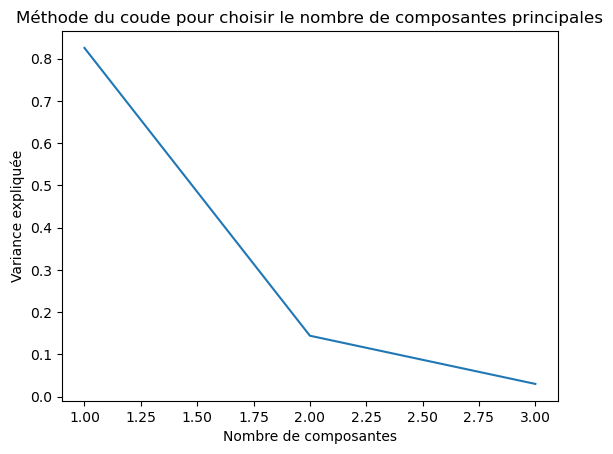

In [79]:
# Tracer la variance expliquée
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.title('Méthode du coude pour choisir le nombre de composantes principales')
plt.show()

In [80]:
#Eboulis à partir des ratios de variance expliquée
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([ 83.,  97., 100.])

In [81]:
# mise à l'échelle standard (standardization) des données contenues dans billets2.
scaler = StandardScaler()

#Centrer et réduite 
X_scaled = scaler.fit_transform(billets2)

In [82]:
#ACP
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [83]:
# Calcul des projections des composantes 
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["PC1", "PC2", "PC3"])
X_proj[:10]

,PC1,PC2,PC3
0,-0.668391,0.926377,-0.039004
1,-1.291527,-0.079318,-0.448980
2,-0.893867,0.569636,0.172227
3,-1.675324,-0.374948,-0.211878
4,0.450666,-1.484056,-0.283274
5,-0.606828,0.639175,-0.104351
6,0.240693,-0.347257,0.291904
7,-1.256810,0.336583,-0.312778
8,-0.326413,-0.770836,-0.233522
9,-0.713373,-0.893922,0.324830


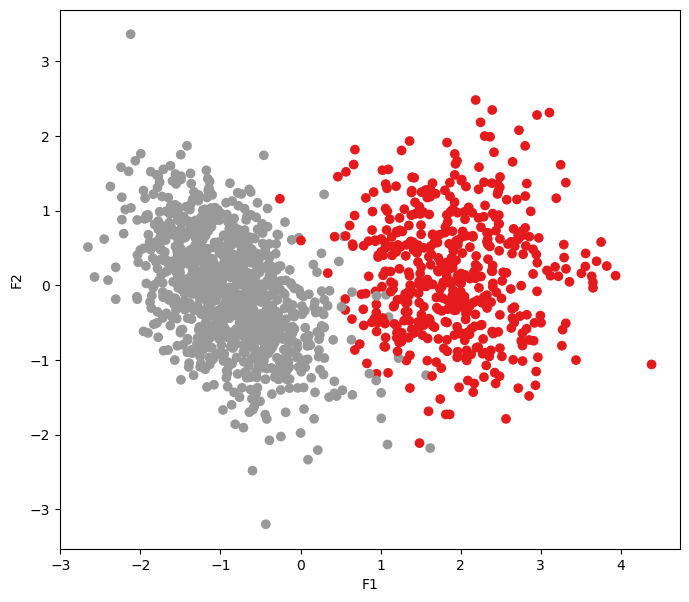

In [84]:
#Nuage de point des individus (billets)
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [85]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroidsTrain)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3"], 
                              index=["cluster_a", "cluster_b"])

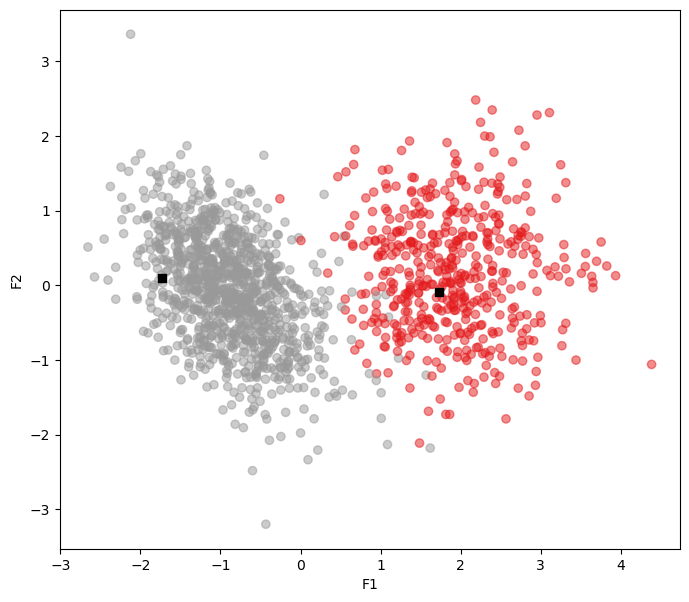

In [86]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

In [87]:
# On intègre les nouveaux clusters au dataframe "billets2"
billets2["cluster"]=labels
billets2

C:\Users\bello\AppData\Local\Temp\ipykernel_33120\3806655490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets2["cluster"]=labels


,margin_low,margin_up,length,cluster
0,4.520000,2.89,112.83,1
1,3.770000,2.99,113.09,1
2,4.400000,2.94,113.16,1
3,3.620000,3.01,113.51,1
4,4.040000,3.48,112.54,1
...,...,...,...,...
1303,5.305269,2.93,111.21,0
1315,5.205657,3.40,112.29,0
1347,5.161149,3.61,110.31,0
1435,5.171746,3.56,111.47,0


In [88]:
# On on crée un autre dataframe "billets3" qui a catégorisation vrai/ faux d'origine
# Il permettra de  faire une fusion avec les colonnes similaires
billets3=billets[['is_genuine','margin_low','margin_up','length']]

In [89]:
billets3.head(5)

,is_genuine,margin_low,margin_up,length
0,1,4.52,2.89,112.83
1,1,3.77,2.99,113.09
2,1,4.40,2.94,113.16
3,1,3.62,3.01,113.51
4,1,4.04,3.48,112.54


In [90]:
#Fusion des dataframes billets 2 et billets3 pour comparer les cluters initiales de "is_genuine" et ceux de "cluster"
df_fusion=billets2.merge(billets3, on=["margin_low","margin_up","length"], how="inner")

In [91]:
df_fusion

,margin_low,margin_up,length,cluster,is_genuine
0,4.520000,2.89,112.83,1,1
1,3.770000,2.99,113.09,1,1
2,4.400000,2.94,113.16,1,1
3,3.620000,3.01,113.51,1,1
4,4.040000,3.48,112.54,1,1
...,...,...,...,...,...
1495,5.305269,2.93,111.21,0,0
1496,5.205657,3.40,112.29,0,0
1497,5.161149,3.61,110.31,0,0
1498,5.171746,3.56,111.47,0,0


In [92]:
df_fusion["cluster"].value_counts()

1    1024
0     476
Name: cluster, dtype: int64

In [93]:
kmeansmatrice=pd.crosstab(df_fusion["cluster"],df_fusion["is_genuine"])
kmeansmatrice

is_genuine,0,1
cluster,,
0,473,3
1,27,997


In [94]:
from sklearn.metrics import silhouette_score


labels = kmeans.labels_
silhouette_avg = silhouette_score(billets2, labels)
print("Silhouette Score :", silhouette_avg)


Silhouette Score : 0.6594876138472684


**<span style="color:blue"> Le score de Silhouette est proche de 1, le clustering de kmeans est bien fait. Les points d'un cluster sont similaires entre eux par rapport aux autres clusters, <span>**

In [95]:
billets2.groupby("cluster").mean()

,margin_low,margin_up,length
cluster,,,
0,5.244370,3.347983,111.573319
1,4.128881,3.060127,113.192236


**<span style="color:blue">Ces valeurs de centroïdes sont remarquablement proches des moyennes calculées par groupe, ce qui est attendu puisque les centroïdes sont déterminés par la moyenne des points dans chaque cluster en K-means. <span>**

<div style="background-color: RGB(0,10,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Tester le modèle</h2>
</div>

# Régression logistique

In [97]:
#Préparation des données d'entraînement
X=billets[["margin_low","margin_up","length"]]
Y=billets["is_genuine"]

In [98]:
#Division de la base de donnée
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [99]:
#Création du modèle
model=LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [100]:
billets_production


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [101]:
billets_production2=billets_production[["margin_low", "margin_up","length"]]

In [102]:
billets_production2.shape

(5, 3)

In [103]:
# Test model
predictions=model.predict(billets_production2)
billets_production2["Prédiction"]=predictions
billets_production2

C:\Users\bello\AppData\Local\Temp\ipykernel_33120\2503581693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets_production2["Prédiction"]=predictions


,margin_low,margin_up,length,Prédiction
0,5.21,3.30,111.42,0
1,6.00,3.31,112.09,0
2,4.99,3.39,111.57,0
3,4.44,3.03,113.20,1
4,3.77,3.16,113.33,1


# Kmeans

In [104]:
billets_production3=billets_production[["margin_low", "margin_up","length"]]

In [105]:
kmeans = KMeans(n_clusters=len(centroidsTrain), random_state=42)
kmeans.fit(billets_production3)


KMeans(n_clusters=2, random_state=42)

In [106]:
kmeans.cluster_centers_=centroidsTrain
Predictionkmeans=kmeans.predict(billets_production3)

In [107]:

billets_production3["prédiction kmeans"]=Predictionkmeans
billets_production3

C:\Users\bello\AppData\Local\Temp\ipykernel_33120\1489945021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets_production3["prédiction kmeans"]=Predictionkmeans


,margin_low,margin_up,length,prédiction kmeans
0,5.21,3.30,111.42,0
1,6.00,3.31,112.09,0
2,4.99,3.39,111.57,0
3,4.44,3.03,113.20,1
4,3.77,3.16,113.33,1


**<span style="color:blue"> La méthode k-means semble faire la même prédiction que celui avec la régression logistique.<span>**

In [108]:
billets_production3.groupby("prédiction kmeans").mean()

,margin_low,margin_up,length
prédiction kmeans,,,
0,5.400,3.333333,111.693333
1,4.105,3.095000,113.265000


In [110]:
centroidsTrain

array([[  5.24635771,   3.34770526, 111.57208421],
       [  4.12904829,   3.06053659, 113.19122927]])

**<span style="color:blue">Ces valeurs de centroïdes sont remarquablement proches des moyennes calculées par groupe, ce qui est attendu puisque les centroïdes sont déterminés par la moyenne des points dans chaque cluster en K-means. <span>**